# Data Science Tools and Software - Lab Assignment 1

Part II - Reuters21785 Dataset
---



## **Reading Data**

### Load Data Into Colab Environment

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/reuters21578-mld/reuters21578.tar.gz
!mkdir /content/reuters21578
!tar -xzf reuters21578.tar.gz -C /content/reuters21578

--2023-11-10 20:19:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/reuters21578-mld/reuters21578.tar.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘reuters21578.tar.gz’

reuters21578.tar.gz     [   <=>              ]   7.77M  17.3MB/s    in 0.4s    

2023-11-10 20:19:27 (17.3 MB/s) - ‘reuters21578.tar.gz’ saved [8150596]



### Read Data From Files Into Dataframe

In [ ]:
import os
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics



# Directory containing all the SGML files
sgml_directory = "/content/reuters21578"

file_list = os.listdir(sgml_directory)
file_list.sort()  # Sort the files inside the directory

# Initialize an empty list to store data
data = []

# Iterate over all SGML files in the directory
for filename in file_list:
    if filename.endswith(".sgm"):
        # Construct the full path to the file
        full_path = os.path.join(sgml_directory, filename)

        # Read the SGML file
        with open(full_path, "r", encoding="latin-1") as file:
            content = file.read()
        # soup contain all the content of the file
        soup = BeautifulSoup(content, "html.parser")
        # let s get only all the tags named Reuters using find_all() function
        reuters_tags = soup.find_all("reuters")

        # we want to find each tag named Reuters and save each tag in a dictionnary ,
        #then finally we will have a list of dictionnaries , each one represent a specific tag

        for reuters_tag in reuters_tags:
            topic = reuters_tag['topics']
            lewissplit = reuters_tag['lewissplit']
            newId = reuters_tag['newid']
            oldId = reuters_tag['oldid']

            date = reuters_tag.find("date").text.strip()
            topics = reuters_tag.find("topics").text.strip()
            places = reuters_tag.find("places").text.strip()
            body = reuters_tag.find("body")
            title = reuters_tag.find("title")
            if topic == "YES"  or topics != "" :
                data.append({
                "Topic": topic,
                "lewissplit": lewissplit,
          #      "oldid": oldId,
          #      "newid": newId,
                "Date": date,
                "Topics": topics,
                "Places": places,
                "Body": body,
                "Title": title
            })




# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)


In [ ]:
df

,Topic,lewissplit,Date,Topics,Places,Body,Title
0,YES,TRAIN,26-FEB-1987 15:01:01.79,cocoa,el-salvadorusauruguay,[Showers continued throughout the week in\nthe...,[BAHIA COCOA REVIEW]
1,YES,TRAIN,26-FEB-1987 15:10:44.60,grainwheatcornbarleyoatsorghum,usa,[The U.S. Agriculture Department\nreported the...,[NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESE...
2,YES,TRAIN,26-FEB-1987 15:14:36.41,veg-oillinseedlin-oilsoy-oilsun-oilsoybeanoils...,argentina,[Argentine grain board figures show\ncrop regi...,[ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS]
3,YES,TRAIN,26-FEB-1987 15:15:40.12,,usa,[Moody's Investors Service Inc said it\nlowere...,[USX <X> DEBT DOWGRADED BY MOODY'S]
4,YES,TRAIN,26-FEB-1987 15:17:11.20,earn,usa,[Champion Products Inc said its\nboard of dire...,[CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT]
...,...,...,...,...,...,...,...
13479,YES,TEST,19-OCT-1987 01:35:27.64,acq,new-zealand,[Chase Corp Ltd <CHCA.WE> said it will\nmake a...,[N.Z.'S CHASE CORP MAKES OFFER FOR ENTREGROWTH]
13480,YES,TEST,19-OCT-1987 00:59:58.56,money-fxdlryen,japanwest-germanyusa,[Tokyo's foreign exchange market is watching\n...,[TOKYO DEALERS SEE DOLLAR POISED TO BREACH 140...
13481,YES,TEST,19-OCT-1987 00:34:08.94,ship,hong-kongjapanindiapakistaniraniraq,[The Japan/India-Pakistan-Gulf/Japan\nshipping...,[JAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CHA...
13482,YES,TEST,19-OCT-1987 00:18:22.79,ipi,ussr,[The Soviet Union's industrial output is\ngrow...,[SOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 1987]


## **Data Cleaning**

### Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13484 entries, 0 to 13483
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Topic       13484 non-null  object
 1   lewissplit  13484 non-null  object
 2   Date        13484 non-null  object
 3   Topics      13484 non-null  object
 4   Places      13484 non-null  object
 5   Body        12352 non-null  object
 6   Title       13415 non-null  object
dtypes: object(7)
memory usage: 737.5+ KB


In [ ]:
df.shape

(13484, 7)

In [ ]:
df.isna().sum()

Topic            0
lewissplit       0
Date             0
Topics           0
Places           0
Body          1132
Title           69
dtype: int64

In [ ]:
# Drop rows with null values in a "Body"
df = df.dropna(subset=["Body"])

In [ ]:
df.shape

(12352, 7)

In [ ]:
# converting articles and topic columns to their text format
df["Body"]=df["Body"].apply(lambda x: x.text)
df["Title"]=df["Title"].apply(lambda x: x.text)

<ipython-input-9-cd707ec560ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Body"]=df["Body"].apply(lambda x: x.text)
<ipython-input-9-cd707ec560ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"]=df["Title"].apply(lambda x: x.text)


In [ ]:
df["Topics"].value_counts()

earn                                       3735
acq                                        2125
                                           1975
crude                                       355
trade                                       333
                                           ... 
tradecoffeerubberpalm-oil                     1
meal-feedgraincornsorghumoilseedsoybean       1
interestgnptrade                              1
tradeoilseedgrain                             1
money-fxdlryendmk                             1
Name: Topics, Length: 647, dtype: int64

In [ ]:
# Replace missing Topic values with 'earn'
df['Topics'] = [value if value != '' else 'earn' for value in df['Topics']]

<ipython-input-11-1a1fe9c44204>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'] = [value if value != '' else 'earn' for value in df['Topics']]


In [ ]:
df["Topics"].iloc[20]

'earn'

In [ ]:
df["Topics"].value_counts()

earn                                       5710
acq                                        2125
crude                                       355
trade                                       333
money-fx                                    259
                                           ... 
tradecoffeerubberpalm-oil                     1
meal-feedgraincornsorghumoilseedsoybean       1
interestgnptrade                              1
tradeoilseedgrain                             1
money-fxdlryendmk                             1
Name: Topics, Length: 646, dtype: int64

In [ ]:
df["Body"].iloc[0]

'Showers continued throughout the week in\nthe Bahia cocoa zone, alleviating the drought since early\nJanuary and improving prospects for the coming temporao,\nalthough normal humidity levels have not been restored,\nComissaria Smith said in its weekly review.\n    The dry period means the temporao will be late this year.\n    Arrivals for the week ended February 22 were 155,221 bags\nof 60 kilos making a cumulative total for the season of 5.93\nmln against 5.81 at the same stage last year. Again it seems\nthat cocoa delivered earlier on consignment was included in the\narrivals figures.\n    Comissaria Smith said there is still some doubt as to how\nmuch old crop cocoa is still available as harvesting has\npractically come to an end. With total Bahia crop estimates\naround 6.4 mln bags and sales standing at almost 6.2 mln there\nare a few hundred thousand bags still in the hands of farmers,\nmiddlemen, exporters and processors.\n    There are doubts as to how much of this cocoa would 

In [ ]:
df.shape

(12352, 7)

### Datetime Conversion

In [ ]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y %H:%M:%S.%f', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df

<ipython-input-16-2fd0a7500fbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y %H:%M:%S.%f', errors='coerce')
<ipython-input-16-2fd0a7500fbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
<ipython-input-16-2fd0a7500fbd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,Topic,lewissplit,Date,Topics,Places,Body,Title,Year,Month
0,YES,TRAIN,1987-02-26 15:01:01.790,cocoa,el-salvadorusauruguay,Showers continued throughout the week in\nthe ...,BAHIA COCOA REVIEW,1987.0,2.0
1,YES,TRAIN,1987-02-26 15:10:44.600,grainwheatcornbarleyoatsorghum,usa,The U.S. Agriculture Department\nreported the ...,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,1987.0,2.0
2,YES,TRAIN,1987-02-26 15:14:36.410,veg-oillinseedlin-oilsoy-oilsun-oilsoybeanoils...,argentina,Argentine grain board figures show\ncrop regis...,ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,1987.0,2.0
3,YES,TRAIN,1987-02-26 15:15:40.120,earn,usa,Moody's Investors Service Inc said it\nlowered...,USX <X> DEBT DOWGRADED BY MOODY'S,1987.0,2.0
4,YES,TRAIN,1987-02-26 15:17:11.200,earn,usa,Champion Products Inc said its\nboard of direc...,CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT,1987.0,2.0
...,...,...,...,...,...,...,...,...,...
13479,YES,TEST,1987-10-19 01:35:27.640,acq,new-zealand,Chase Corp Ltd <CHCA.WE> said it will\nmake an...,N.Z.'S CHASE CORP MAKES OFFER FOR ENTREGROWTH,1987.0,10.0
13480,YES,TEST,1987-10-19 00:59:58.560,money-fxdlryen,japanwest-germanyusa,Tokyo's foreign exchange market is watching\nn...,TOKYO DEALERS SEE DOLLAR POISED TO BREACH 140 YEN,1987.0,10.0
13481,YES,TEST,1987-10-19 00:34:08.940,ship,hong-kongjapanindiapakistaniraniraq,The Japan/India-Pakistan-Gulf/Japan\nshipping ...,JAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CHARGES,1987.0,10.0
13482,YES,TEST,1987-10-19 00:18:22.790,ipi,ussr,The Soviet Union's industrial output is\ngrowi...,SOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 1987,1987.0,10.0


### Cleaning Text Data

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Get the stop words
stop_words = stopwords.words('english')

In [ ]:
def clean_Body(row):
    # remove url links
    row = re.sub("http\s+", '', row)
    # remove html tags
    row = re.sub("<[^<]+?>", '', row)
    # remove special characters, numbers and punctuations
    row = re.sub("[^A-za-z+ ]", ' ', row)
    # lower the text
    row = row.lower()
    # remove stopwords and words that have length of 1
    row = " ".join(word for word in nltk.wordpunct_tokenize(row) if len(word)!=2 and word not in stop_words)

    return row

In [ ]:
df["Body"]=df["Body"].apply(lambda x:clean_Body(x))
df["Title"]=df["Title"].apply(lambda x:clean_Body(x))

<ipython-input-20-4c678498c7cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Body"]=df["Body"].apply(lambda x:clean_Body(x))
<ipython-input-20-4c678498c7cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"]=df["Title"].apply(lambda x:clean_Body(x))


## **Exploratory Data Analysis**

### Data Visualization


In [ ]:
df['Year'].unique()

array([1987.,   nan])

All dates have the year 1987, as the Reuters21785 dataset was collected in 1987.

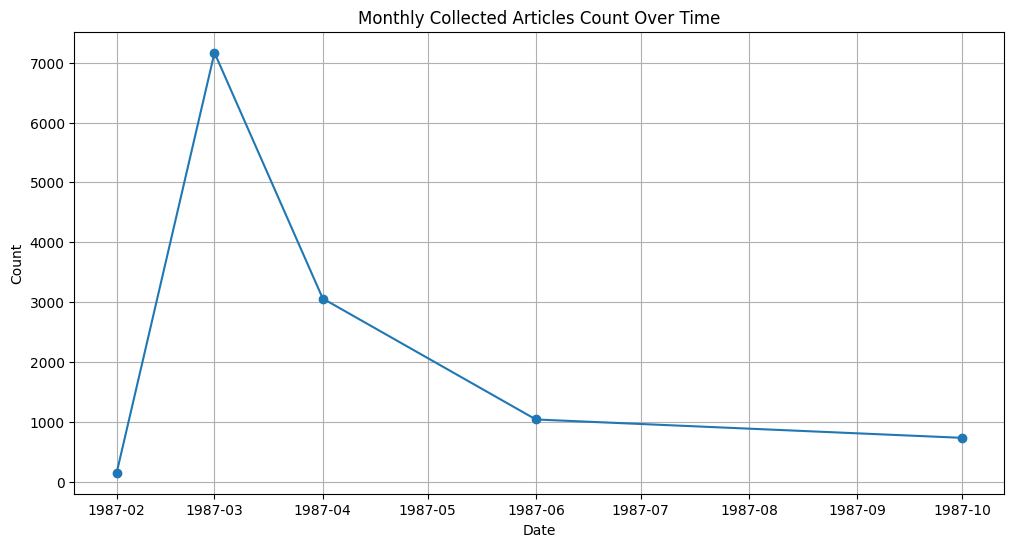

In [ ]:
monthly_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Set 'Year' and 'Month' as datetime for better plotting
monthly_counts['Date'] = pd.to_datetime(monthly_counts[['Year', 'Month']].assign(day=1))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['Date'], monthly_counts['Count'], marker='o')
plt.title('Monthly Collected Articles Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [ ]:
df["Topics"].value_counts(normalize=True)

earn                                       0.462273
acq                                        0.172037
crude                                      0.028740
trade                                      0.026959
money-fx                                   0.020968
                                             ...   
tradecoffeerubberpalm-oil                  0.000081
meal-feedgraincornsorghumoilseedsoybean    0.000081
interestgnptrade                           0.000081
tradeoilseedgrain                          0.000081
money-fxdlryendmk                          0.000081
Name: Topics, Length: 646, dtype: float64

We can see that 'earn' is the most common topic in the documents with 46%

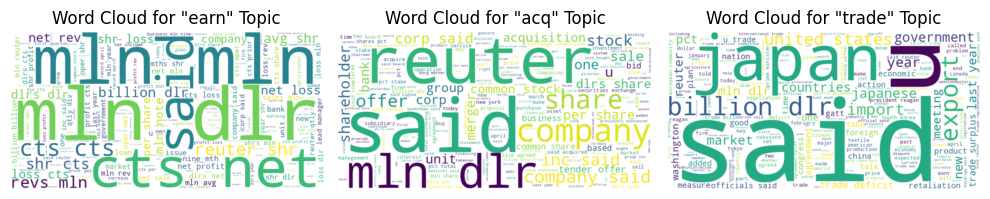

In [ ]:
from wordcloud import WordCloud

# Filter data for 'earn' and 'acq' topics
earn_data = df[df['Topics'] == 'earn']['Body'].str.cat(sep=' ')
acq_data = df[df['Topics'] == 'acq']['Body'].str.cat(sep=' ')
trade_data=df[df['Topics']=="trade"]['Body'].str.cat(sep=' ')
# Generate word clouds
earn_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(earn_data)
acq_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(acq_data)
trade_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trade_data)


# Plot the word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(earn_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for "earn" Topic')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(acq_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for "acq" Topic')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(trade_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for "trade" Topic')
plt.axis('off')

plt.tight_layout()
plt.show()


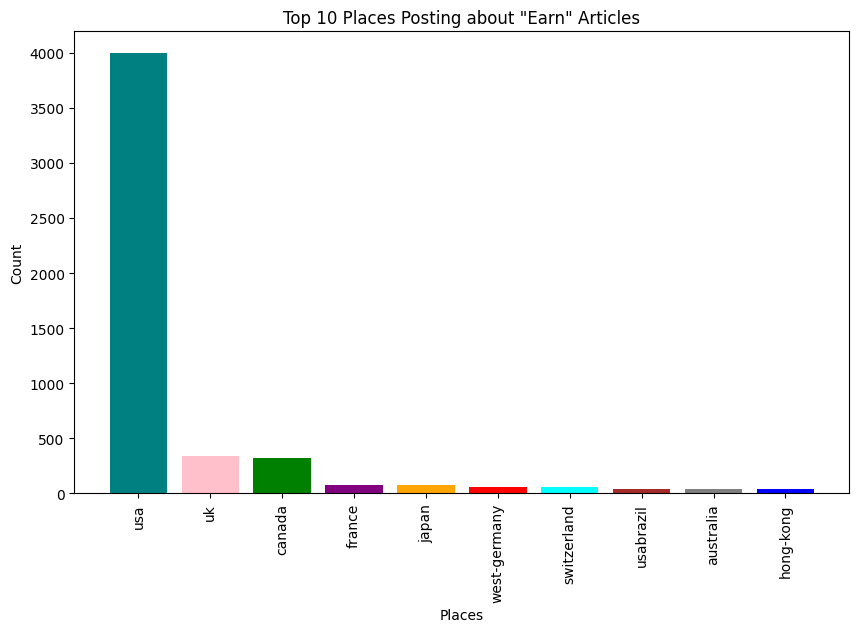

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame to only include rows with "earn" topics
df_earn = df[df["Topics"] == "earn"]

# Get the counts of places posting about "earn" articles
place_counts = df_earn["Places"].value_counts()

# Select the top 10 countries
top_10_places = place_counts.head(10)
colors = ['teal', 'pink', 'green', 'purple', 'orange', 'red' , 'cyan', 'brown', 'gray', 'blue']

# Plotting the histogram for top 10 places
plt.figure(figsize=(10, 6))
plt.bar(top_10_places.index, top_10_places.values, color=colors)
plt.xlabel('Places')
plt.ylabel('Count')
plt.title('Top 10 Places Posting about "Earn" Articles')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Count the number of articles published in each place
places_counts = df['Places'].value_counts()

# Select the top 5 places with the highest publication frequency
top_5_places = places_counts.head(5)

top_5_places

usa             6723
uk               747
canada           586
japan            291
west-germany     214
Name: Places, dtype: int64

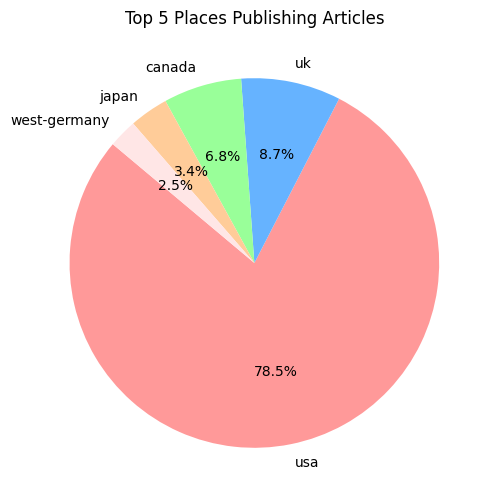

In [ ]:
custom_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#FFE6E6']

# Create a pie chart of the top 5 places with the highest publication frequency
plt.figure(figsize=(6, 6))
plt.pie(top_5_places, labels= top_5_places.index, autopct='%1.1f%%', startangle=140, colors= custom_colors)
plt.title('Top 5 Places Publishing Articles')
plt.show()

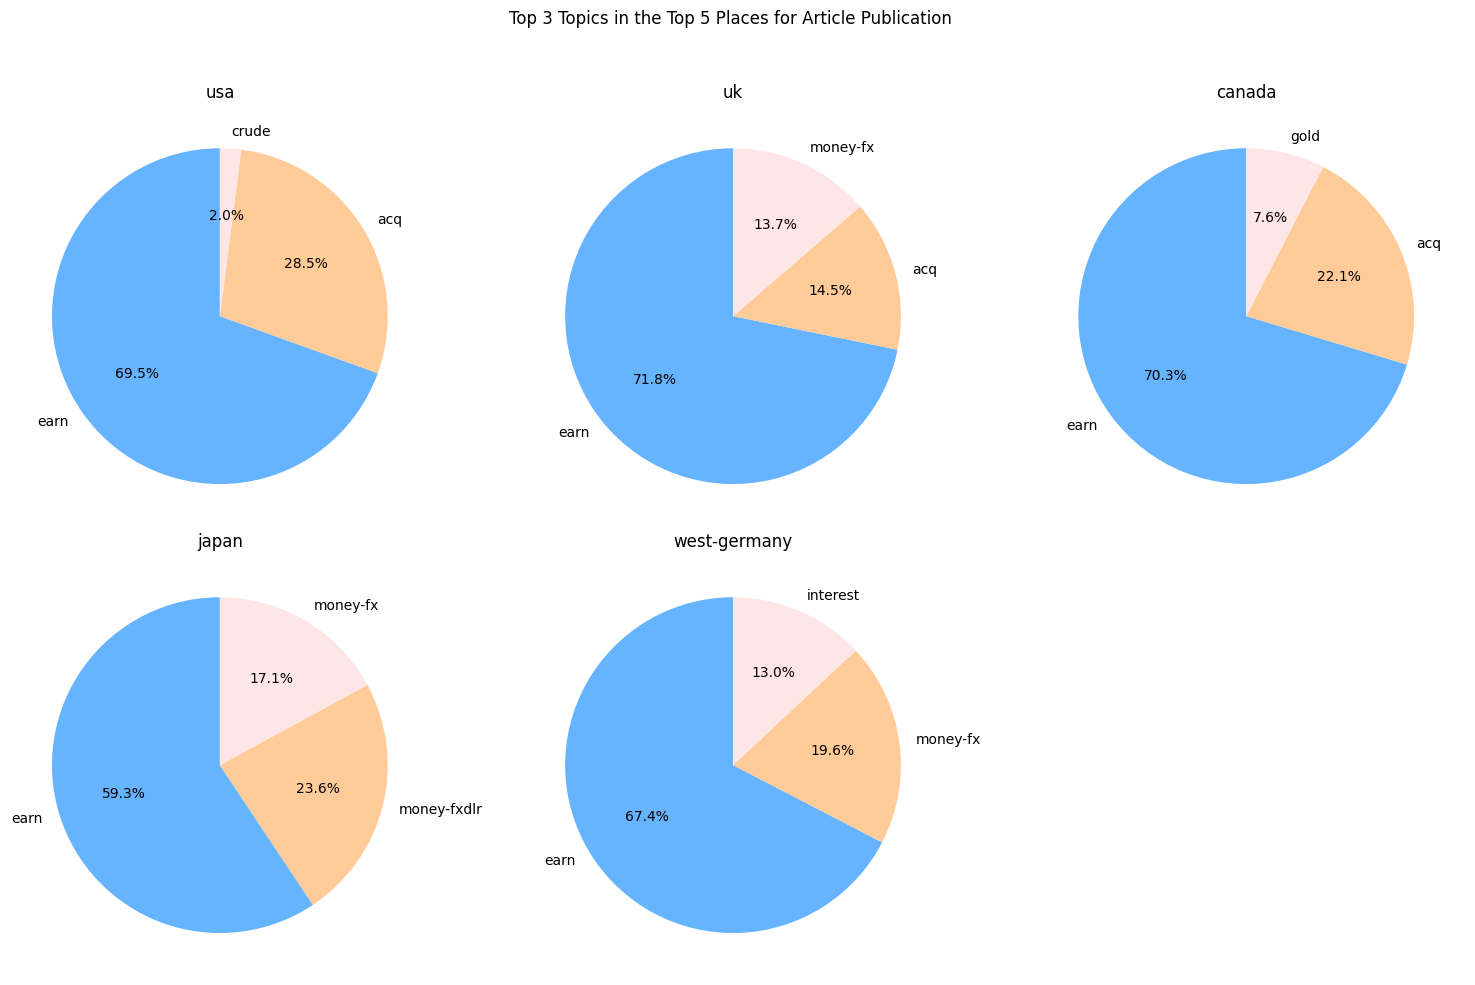

In [ ]:
# Select the top 5 places with the highest publication frequency
top_5_places = places_counts.head(5).index

custom_colors = ['#66b3ff','#ffcc99', '#FFE6E6']
# Create subplots for each place
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Top 3 Topics in the Top 5 Places for Article Publication')

for i, place in enumerate(top_5_places):
    # Filter the data for the current place
    filtered_data = df[df['Places'] == place]

    # Count the number of articles in each topic
    topic_counts = filtered_data['Topics'].value_counts()

    # Select the top 3 topics for the current place
    top_3_topics = topic_counts.head(3)

    # Create a pie chart for the current place
    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.pie(top_3_topics, labels=top_3_topics.index, autopct='%1.1f%%', startangle=90 ,  colors=custom_colors)
    ax.set_title(place)

axes[1, 2].axis('off')  # hide empty plot grid at the end

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<ipython-input-29-b206b0a72feb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WordCount'] = [len(s.split()) for s in df['Body']]


Text(0.5, 1.0, "Distribution of Articles' Word Count")

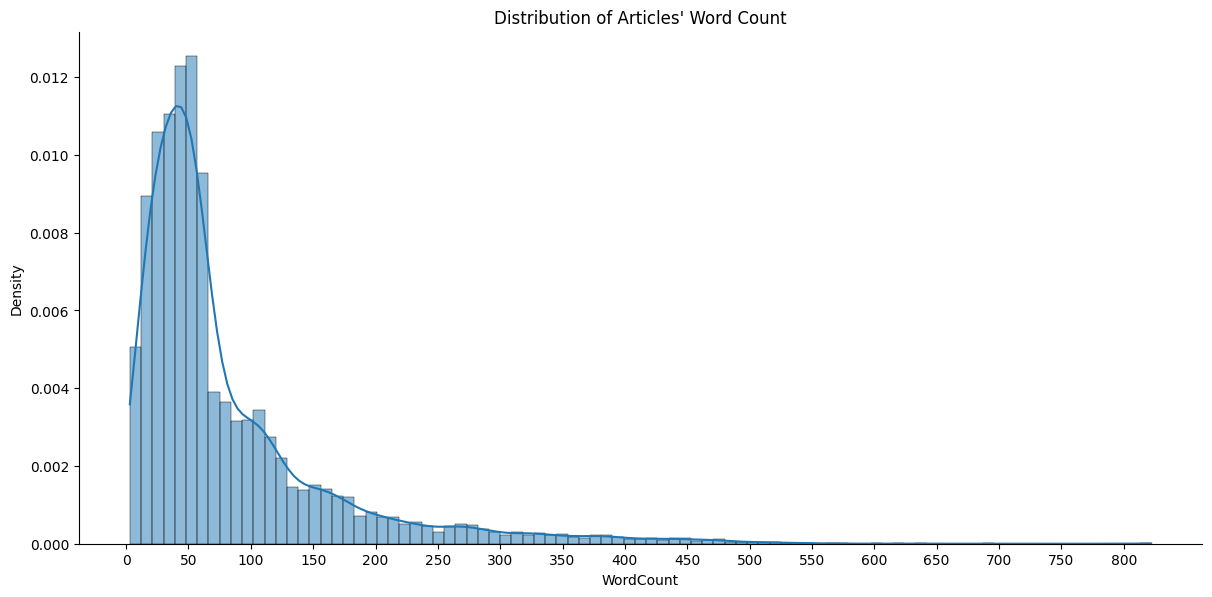

In [ ]:
import seaborn as sns
# create word count column
df['WordCount'] = [len(s.split()) for s in df['Body']]

# plot word count histogram
g = sns.displot(df, x="WordCount", binwidth=9, stat="density",kde=True)
new_ticks = [i for i in range(0, df['WordCount'].max() + 1, 50)] # add ticks every 50 words
g.set(xticks=new_ticks)
g.fig.set_figwidth(14)
g.fig.set_figheight(6)
plt.title("Distribution of Articles' Word Count")

We can see that the majority of articles are between 10-70 words.

Text(0.5, 1.0, 'Boxplot of Word Count Distribution for the Top 10 Topics')

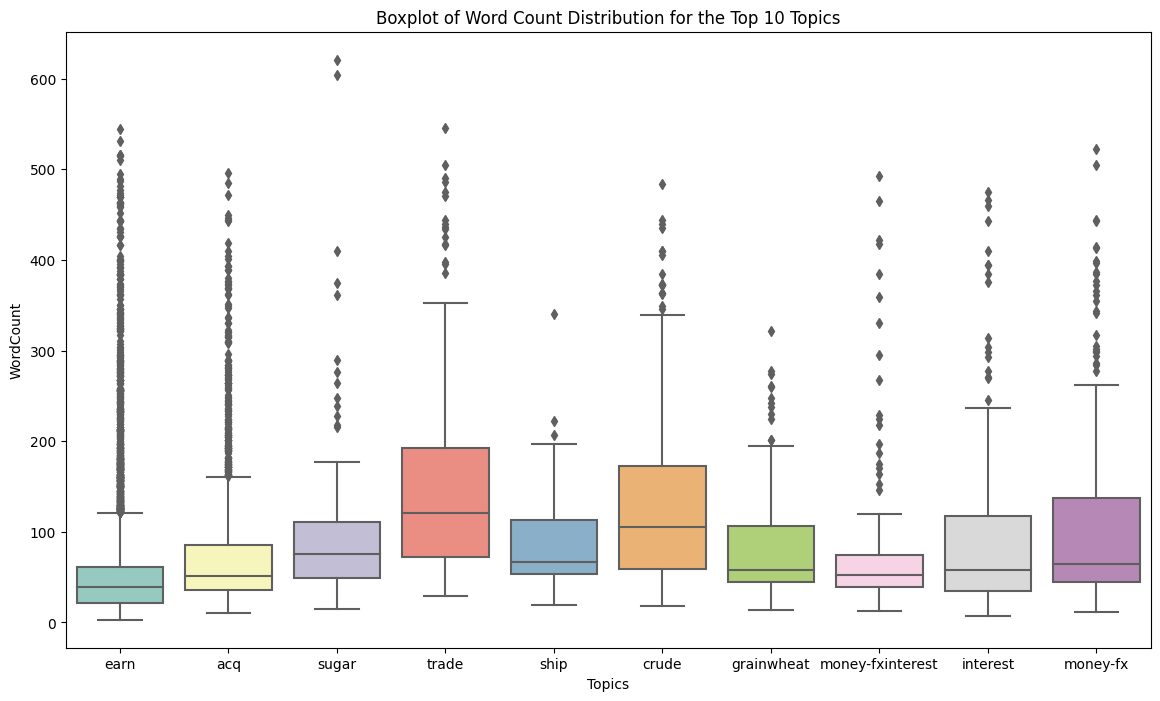

In [ ]:
# get top 10 topics
topics_count = df['Topics'].value_counts()
highest_topics = topics_count[0:10].index

# plot boxplots
plt.figure(figsize=(14,8))
sns.boxplot(
    data=df[df['Topics'].isin(highest_topics)],
    x="Topics",
    y="WordCount",
    palette="Set3"
)
plt.title("Boxplot of Word Count Distribution for the Top 10 Topics")

In [ ]:
!pip install scattertext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 48.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=bbaa84a1e5e0adaaa767618974e9def432834bea950216e6bc438f327278d16f
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext


In [ ]:
df_earn=df[df["Topics"]=="earn"]    # all the documents that its topic is earn
df_others=df[df["Topics"]!="earn"]  # the rest of the documents (not earn)

In [ ]:
import scattertext as st
from IPython.display import HTML

scatter_data = pd.concat([df_earn, df_others.assign(Topics='other')])[['Topics', 'Title']]

# Create a Scattertext Corpus
corpus = st.CorpusFromPandas(scatter_data,
                              category_col='Topics',
                              text_col='Title',
                              nlp=st.whitespace_nlp_with_sentences
                             ).build()

# Create a Scattertext plot
html = st.produce_scattertext_explorer(corpus,
                                       category='earn',
                                       category_name='earn',
                                       not_category_name='other',
                                       width_in_pixels=1000)

HTML(html)

### Dissimilarity Matrix

In [ ]:
unique_places = df["Places"].unique()
print(unique_places)

['el-salvadorusauruguay' 'usa' 'argentina' 'yemen-arab-republicusa'
 'usabrazilvenezuela' 'canada' 'uk' 'brazil' 'new-zealand' 'usapanama'
 'usahonduras' 'usaphilippines' 'usachina' 'venezuela' 'usabrazil'
 'usaalgeria' 'switzerland' 'usaussr' 'usaargentina' 'france' 'japan'
 'australia' 'thailand' 'philippines' 'ukcolombia' 'italy' 'indonesia'
 'kuwaitecuador' 'indonesiausa' 'chinajapan' 'china' 'bahrainsaudi-arabia'
 'bangladesh' 'qatar' 'bahrainkuwaitomansaudi-arabiaqataruae' 'ukbrazil'
 'egyptcanada' 'zambia' 'polandusa' 'australiausa' 'indonesiaphilippines'
 'sri-lanka' 'saudi-arabiauae' 'west-germany' 'bahrainiraq' 'taiwan'
 'india' 'netherlands' 'japanchina' 'hong-kong' 'sweden' 'indonesiachina'
 'japannigeria' 'south-africa'
 'malaysiaindonesiathailandzairebolivianigeriaaustraliabrazilchina'
 'south-korea' 'usauk' 'ukindia' 'taiwanusajapan' 'ukusa' 'ukpakistan'
 'swedensouth-africa' 'japanusa' 'belgiumussr' 'argentinausa'
 'uaebahrainsaudi-arabiakuwaitqatar' 'saudi-arabiabahrai

In [ ]:
df.head(30)

,Topic,lewissplit,Date,Topics,Places,Body,Title,Year,Month,WordCount
0,YES,TRAIN,1987-02-26 15:01:01.790,cocoa,el-salvadorusauruguay,showers continued throughout week bahia cocoa ...,bahia cocoa review,1987.0,2.0,287
1,YES,TRAIN,1987-02-26 15:10:44.600,grainwheatcornbarleyoatsorghum,usa,u agriculture department reported farmer owned...,national average prices farmer owned reserve,1987.0,2.0,81
2,YES,TRAIN,1987-02-26 15:14:36.410,veg-oillinseedlin-oilsoy-oilsun-oilsoybeanoils...,argentina,argentine grain board figures show crop regist...,argentine grain oilseed registrations,1987.0,2.0,108
3,YES,TRAIN,1987-02-26 15:15:40.120,earn,usa,moody investors service inc said lowered debt ...,usx debt dowgraded moody,1987.0,2.0,57
4,YES,TRAIN,1987-02-26 15:17:11.200,earn,usa,champion products inc said board directors app...,champion products approves stock split,1987.0,2.0,35
5,YES,TRAIN,1987-02-26 15:18:06.670,acq,usa,computer terminal systems inc said completed s...,computer terminal systems completes sale,1987.0,2.0,125
6,YES,TRAIN,1987-02-26 15:18:59.340,earn,usa,shr cts dlrs net assets mln mln deposits mln m...,cobanco inc year net,1987.0,2.0,29
7,YES,TRAIN,1987-02-26 15:19:15.450,earnacq,usa,ohio mattress said first quarter ending februa...,ohio mattress may lower qtr net,1987.0,2.0,75
8,YES,TRAIN,1987-02-26 15:20:13.090,earn,usa,oper shr loss two cts profit seven cts oper sh...,international inc qtr jan,1987.0,2.0,64
9,YES,TRAIN,1987-02-26 15:20:27.170,earn,usa,shr one dlr cts net mln mln revs mln mln nine ...,brown forman inc qtr net,1987.0,2.0,22


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# create a document-term matrix for the first 10 documents
vect = CountVectorizer(max_features=20)
transform_vect = vect.fit_transform(df["Places"][21:30])

# rename the indices as doc_#
index = ['doc_{}'.format(i) for i in range(9)]

# create a dataframe
dist_df = pd.DataFrame(
      transform_vect.todense()
    , columns=vect.get_feature_names_out()
    , index=index
)

# view two docs
dist_df.loc[['doc_0', 'doc_2', 'doc_3', 'doc_4', 'doc_8' ], :]

,brazil,canada,uk,usa
doc_0,0,0,0,1
doc_2,0,1,0,0
doc_3,0,0,0,1
doc_4,0,0,1,0
doc_8,1,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix in a specific column
similarity_matrix = cosine_similarity(transform_vect)

# Convert the similarity matrix to a dataframe
similarity_df = pd.DataFrame(similarity_matrix, index=index, columns=index)

# Print the similarity matrix
print(similarity_df)

       doc_0  doc_1  doc_2  doc_3  doc_4  doc_5  doc_6  doc_7  doc_8
doc_0    1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0
doc_1    1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0
doc_2    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0
doc_3    1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0
doc_4    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0
doc_5    1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0
doc_6    1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0
doc_7    1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0
doc_8    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


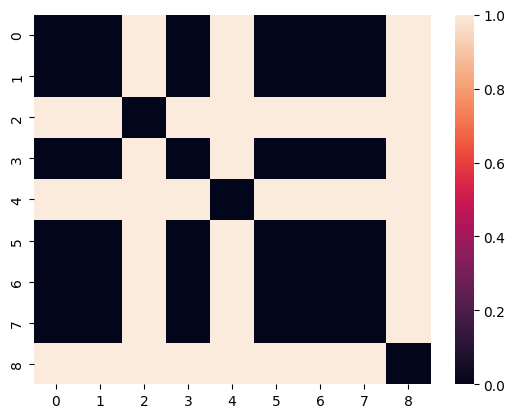

In [ ]:
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

# calculate jaccard distance on all documents
jaccard = pairwise_distances(dist_df.values, metric='jaccard')

sns.heatmap(pairwise_distances(dist_df.values, Y=None, metric='jaccard'));

In [ ]:
# save dissimilarity matrix into csv file
pd.DataFrame(jaccard).to_csv('dissimilarity_8.csv', index=False)

In [ ]:
for doc_ind in range(0,5):
    print('jaccard distance {}'.format(jaccard[0][doc_ind])) # focus on the first doc (index 0)
    print(dist_df.iloc[[0, doc_ind], :], '\n\n')  # print the first doc and the comparison document

jaccard distance 0.0
       brazil  canada  uk  usa
doc_0       0       0   0    1
doc_0       0       0   0    1 


jaccard distance 0.0
       brazil  canada  uk  usa
doc_0       0       0   0    1
doc_1       0       0   0    1 


jaccard distance 1.0
       brazil  canada  uk  usa
doc_0       0       0   0    1
doc_2       0       1   0    0 


jaccard distance 0.0
       brazil  canada  uk  usa
doc_0       0       0   0    1
doc_3       0       0   0    1 


jaccard distance 1.0
       brazil  canada  uk  usa
doc_0       0       0   0    1
doc_4       0       0   1    0 




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# create a document-term matrix for the first 10 documents
vect = CountVectorizer(max_features=20)
transform_vect = vect.fit_transform(df["Topics"][3:30])

# rename the indices as doc_#
index = ['doc_{}'.format(i) for i in range(27)]

# create a dataframe
dist_df = pd.DataFrame(
      transform_vect.todense()
    , columns=vect.get_feature_names_out()
    , index=index
)

# view two docs
dist_df.loc[['doc_1', 'doc_15',  'doc_25','doc_26'], :]

,acq,acqship,coffee,copper,earn,earnacq,housing,sugar,trade,wheatgrain
doc_1,0,0,0,0,1,0,0,0,0,0
doc_15,0,0,0,0,0,0,1,0,0,0
doc_25,0,0,0,0,0,0,0,1,0,0
doc_26,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(transform_vect)

# Convert the similarity matrix to a dataframe
similarity_df = pd.DataFrame(similarity_matrix, index=index, columns=index)

# Print the similarity matrix
print(similarity_df)

        doc_0  doc_1  doc_2  doc_3  doc_4  doc_5  doc_6  doc_7  doc_8  doc_9  \
doc_0     1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0   
doc_1     1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0   
doc_2     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
doc_3     1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0   
doc_4     0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
doc_5     1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0   
doc_6     1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0   
doc_7     1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0   
doc_8     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
doc_9     1.0    1.0    0.0    1.0    0.0    1.0    1.0    1.0    0.0    1.0   
doc_10    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
doc_11    1.0    1.0    0.0    1.0    0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


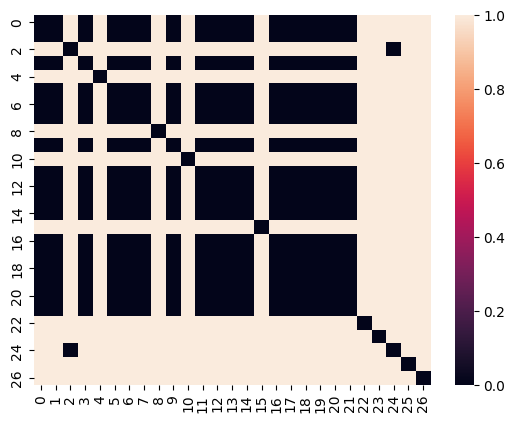

In [ ]:
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

# calculate jaccard distance on all documents
jaccard = pairwise_distances(dist_df.values, metric='jaccard')

sns.heatmap(pairwise_distances(dist_df.values, Y=None, metric='jaccard'));

In [ ]:
# save dissimilarity matrix into csv file
pd.DataFrame(jaccard).to_csv('dissimilarity_26.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
nltk.download('punkt')

#using cosine similarity in all the document not just a specific column

# Assign the DataFrame to df_doc
df_doc = df

# Preprocess the text data
doc_corp = [' '.join(word_tokenize(str(row).lower())) for row in df_doc.values]

# Compute the TF-IDF matrix
tfidf_df = TfidfVectorizer(stop_words='english')
tf_idf_matrix = tfidf_df.fit_transform(doc_corp)

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(tf_idf_matrix, tf_idf_matrix)

# Convert the similarity matrix to a DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=df_doc.index, columns=df_doc.index)

# Print the similarity matrix
print(similarity_df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


          0         1         2         3         4         5         6      \
0      1.000000  0.042100  0.037502  0.023047  0.029121  0.028867  0.063557   
1      0.042100  1.000000  0.047045  0.018604  0.020099  0.041666  0.044188   
2      0.037502  0.047045  1.000000  0.009406  0.026414  0.017474  0.011346   
3      0.023047  0.018604  0.009406  1.000000  0.052791  0.034345  0.050322   
4      0.029121  0.020099  0.026414  0.052791  1.000000  0.105916  0.096343   
...         ...       ...       ...       ...       ...       ...       ...   
13479  0.025558  0.005372  0.000428  0.009684  0.047203  0.041773  0.026192   
13480  0.042103  0.066062  0.001550  0.017258  0.015882  0.027921  0.010232   
13481  0.033546  0.006401  0.008940  0.004972  0.008219  0.016515  0.005509   
13482  0.053153  0.011976  0.010762  0.009082  0.011798  0.026816  0.034418   
13483  0.003280  0.007029  0.001083  0.007643  0.017486  0.013970  0.006049   

          7         8         9      ...     13474 

## **Data Transformation**

In [ ]:
# segregating the data into train and test dataframes
df_train = df[df["lewissplit"]=="TRAIN"]
df_test  = df[df["lewissplit"]=="TEST"]

In [ ]:
#initializing the vectorizer.
tfidf = TfidfVectorizer(min_df=5)

In [ ]:
# vectorizing train and test datasets
X_train = tfidf.fit_transform(df_train["Body"].tolist())
X_test  = tfidf.transform(df_test["Body"].tolist())

In [ ]:
# coverting the labels to binary- 1 for earn and 0 for others
y_train = df_train["Topics"].apply(lambda x: 1 if x=="earn" else 0).tolist()
y_test  = df_test["Topics"].apply(lambda x: 1 if x=="earn" else 0).tolist()

In [ ]:
print(f"The vectorizer has {X_train.shape[0]} rows and {X_train.shape[1]} features")

The vectorizer has 8767 rows and 7476 features


In [ ]:
from collections import Counter

In [ ]:
counter=Counter(y_train)
counter     # Imbalanced data

Counter({0: 4395, 1: 4372})

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [ ]:
counter=Counter(y_train)
counter

Counter({0: 4395, 1: 4395})

## **Modelling**

In [ ]:
def make_confusion_matrix(y_actual,y_predict,type_data):
    cm = metrics.confusion_matrix(y_actual, y_predict)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['others', 'earn']
    plt.title(f'Confusion Matrix - {type_data} Data')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    for i in range(2):
        for j in range(2):
            plt.text(j,i,str(cm[i][j]))
    plt.show()
    print(f"\n Classification Matrix for {type_data} data:\n",metrics.classification_report(y_actual, y_predict))

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train,y_train))
        print("Accuracy on test set : ",     model.score(X_test,y_test))
        print("\nRecall on training set : ", metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",       metrics.recall_score(y_test,pred_test))
        print("\nPrecision on training set : ", metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",     metrics.precision_score(y_test,pred_test))
        print("\nF1 score on training set : ", metrics.f1_score(y_train,pred_train))
        print("F1 score on test set : ",     metrics.f1_score(y_test,pred_test))


    return score_list # returning the list with train and test scores

### Linear SVC Model

In [ ]:
svc_model = LinearSVC(random_state=42)
svc_model.fit(X_train, y_train)

LinearSVC(random_state=42)

In [ ]:
svc_score=get_metrics_score(svc_model,flag=True)

Accuracy on training set :  0.9920364050056882
Accuracy on test set :  0.9664674634794157

Recall on training set :  0.9927189988623436
Recall on test set :  0.9717125382262997

Precision on training set :  0.9913655987275619
Precision on test set :  0.9520599250936329

F1 score on training set :  0.9920418371987267
F1 score on test set :  0.9617858494135451


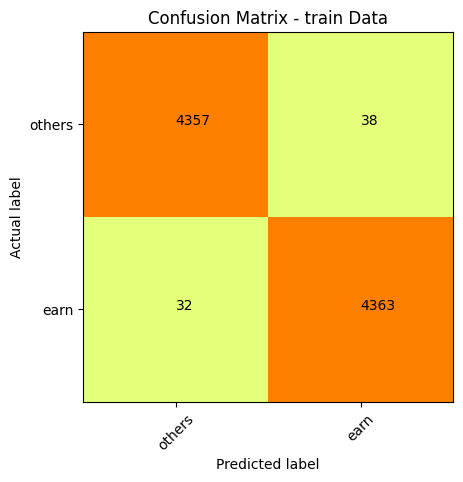


 Classification Matrix for train data:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4395
           1       0.99      0.99      0.99      4395

    accuracy                           0.99      8790
   macro avg       0.99      0.99      0.99      8790
weighted avg       0.99      0.99      0.99      8790



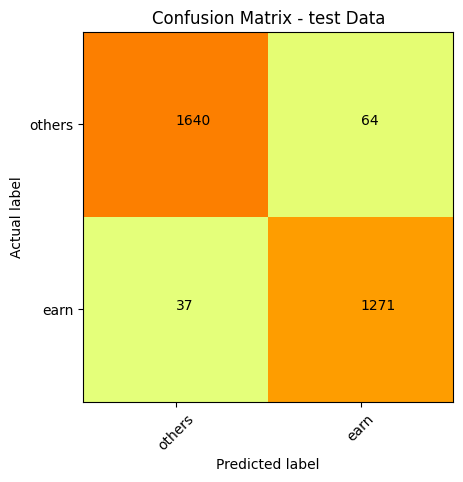


 Classification Matrix for test data:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1704
           1       0.95      0.97      0.96      1308

    accuracy                           0.97      3012
   macro avg       0.96      0.97      0.97      3012
weighted avg       0.97      0.97      0.97      3012



In [ ]:
y_pred_train=svc_model.predict(X_train)
y_pred_test=svc_model.predict(X_test)
## training data
make_confusion_matrix(y_train,y_pred_train,"train")
## training data
make_confusion_matrix(y_test,y_pred_test,"test")